In [47]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# carrega o dataset
dataset = pd.read_csv('01.1-clusterizacao-kmeans.csv', delimiter=';', decimal=',')

faturamentoBruto = dataset['faturamentoBruto']
margemBruta = dataset['margemBruta']
restricoes = dataset['restricoes']
cluster = dataset["cluster"]

dataset_norm = pd.concat([faturamentoBruto, margemBruta, restricoes], axis=1)

scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(dataset_norm)
dataset_norm = pd.DataFrame(dataset_norm, columns = ['faturamentoBruto','margemBruta','restricoes'])
dataset_norm = pd.concat([dataset_norm, cluster], axis=1)

# print(dataset.head())

<AxesSubplot:xlabel='cluster', ylabel='count'>

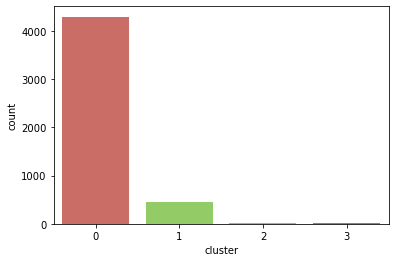

In [49]:
sb.countplot(x='cluster', data=dataset, palette='hls')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1288
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         7

    accuracy                           1.00      1433
   macro avg       1.00      1.00      1.00      1433
weighted avg       1.00      1.00      1.00      1433

1.0


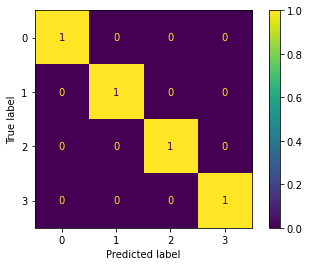

In [59]:
dataset0 = dataset_norm[(dataset_norm['cluster'] == 0)]
dataset1 = dataset_norm[(dataset_norm['cluster'] == 1)]
dataset2 = dataset_norm[(dataset_norm['cluster'] == 2)]
dataset3 = dataset_norm[(dataset_norm['cluster'] == 3)]

X0 = dataset0.iloc[:,[0,1,2]].values
y0 = dataset0.iloc[:,3].values
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=.3, random_state=25)

X1 = dataset1.iloc[:,[0,1,2]].values
y1 = dataset1.iloc[:,3].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=25)

X2 = dataset2.iloc[:,[0,1,2]].values
y2 = dataset2.iloc[:,3].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=25)

X3 = dataset3.iloc[:,[0,1,2]].values
y3 = dataset3.iloc[:,3].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.3, random_state=25)

X_train = np.concatenate([X0_train, X1_train, X2_train, X3_train], axis=0)
X_test = np.concatenate([X0_test, X1_test, X2_test, X3_test], axis=0)
y_train = np.concatenate([y0_train, y1_train, y2_train, y3_train], axis=0)
y_test = np.concatenate([y0_test, y1_test, y2_test, y3_test], axis=0)

Classif_KNN = KNeighborsClassifier(n_neighbors=4)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# plot_confusion_matrix(Classif_KNN, X_test, y_test, normalize = 'true')

# print(classification_report(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))
#0.7790262172284644


# testa do K=1 até K=26
# k_range = range(1, 26)

# Lista todas as acurácias
# scores = []

# Faz um loop de 1 a 26 armazena no dicionário scores
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(accuracy_score(y_test, y_pred))

# print(scores)
#Plota os valores de acc. em função do valor escolhido de K
# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')

#Avaliando a melhor configuração de KNN
best_KNN = KNeighborsClassifier(n_neighbors=3) # 3
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(best_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))